<a href="https://www.kaggle.com/code/william2020/temporal-trends-in-marine-microplastic-density?scriptVersionId=187748267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring & Predicting Temporal Trends in Marine Microplastic Density

Welcome to this comprehensive analysis of marine microplastic density over time. Marine microplastics, tiny plastic particles less than 5mm in size, have become a significant environmental concern due to their widespread presence and potential harm to marine ecosystems. Understanding the temporal trends and spatial distribution of microplastics is crucial for developing effective strategies to mitigate their impact.

In this notebook, we will dive deep into a dataset containing information about microplastic measurements collected from various oceans, regions, and sampling methods over several years. By leveraging powerful data analysis and visualization techniques, we aim to uncover temporal patterns and insights that can help us better understand the distribution and dynamics of marine microplastics.

### Objectives

1. **Analyze Temporal Trends**: Examine how microplastic density changes over time across different oceans and regions.
2. **Explore Monthly and Seasonal Variations**: Identify any recurring patterns or fluctuations in microplastic density on a monthly and seasonal basis.
3. **Compare Sampling Methods**: Evaluate the effectiveness of various sampling methods in detecting microplastics.
4. **Geospatial Analysis**: Visualize the geographical distribution of microplastic density over time.
5. **Density Class Analysis**: Investigate how different density classes of microplastics vary over the years.
6. **Organizational Contributions**: Assess the contributions of different organizations to the collection and analysis of microplastic data.

### Dataset Overview

The dataset includes the following key columns:

- **OBJECTID**: Unique identifier for each record.
- **Oceans**: Name of the ocean where the sample was collected.
- **Regions**: Specific region within the ocean.
- **SubRegions**: Subregion within the region.
- **Sampling Method**: Method used to collect the sample.
- **Measurement**: Microplastic density measurement (pieces/m3).
- **Unit**: Unit of the measurement.
- **Density Range**: Range of the density measurement.
- **Density Class**: Classification of the density (e.g., Very Low, Low, Medium, High, Very High).
- **Short Reference**: Reference for the study.
- **Organization**: Organization responsible for the data collection.
- **Keywords**: Keywords related to the study.
- **Accession Number**: Accession number for the data record.
- **Accession Link**: Link to the data record.
- **Latitude**: Latitude of the sample location.
- **Longitude**: Longitude of the sample location.
- **Date**: Date when the sample was collected.
- **GlobalID**: Global identifier for the record.
- **x**: X-coordinate of the sample location.
- **y**: Y-coordinate of the sample location.

### Methodology

We will begin by preparing the data, including converting date fields, handling missing values, and categorizing relevant columns. Next, we will perform a series of temporal analyses to explore how microplastic density has changed over the years, months, and seasons. We will also compare the effectiveness of different sampling methods and examine the contributions of various organizations.

Each section of this notebook will include detailed visualizations to help us uncover patterns and insights. By the end of this analysis, we hope to have a clearer understanding of the temporal and spatial dynamics of marine microplastics, which can inform future research and policy decisions.

Let's get started!

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
file_path = '/kaggle/input/marine-microplastics/Marine_Microplastics.csv'

df = pd.read_csv(file_path)

df.head()

OBJECTID          Oceans Regions SubRegions  Sampling Method  Measurement  \
0      9676  Atlantic Ocean     NaN        NaN      Grab sample        0.018   
1      6427   Pacific Ocean     NaN        NaN      Neuston net        0.000   
2     10672   Pacific Ocean     NaN        NaN        Manta net        0.013   
3     13921  Atlantic Ocean     NaN        NaN  Aluminum bucket     1368.000   
4      9344   Pacific Ocean     NaN        NaN      Grab sample        0.001   

        Unit Density Range Density Class       Short Reference  ...  \
0  pieces/m3       0.005-1        Medium    Barrows et al.2018  ...   
1  pieces/m3      0-0.0005      Very Low        Law et al.2014  ...   
2  pieces/m3       0.005-1        Medium  Goldstein et al.2013  ...   
3  pieces/m3          >=10     Very High    Queiroz et al.2022  ...   
4  pieces/m3  0.0005-0.005           Low    Barrows et al.2018  ...   

                                        Organization  \
0                                Adventure Scientist   
1                          Sea Education Association   
2  Scripps Institution of Oceanography-University...   
3                 Federal University of Pará, Brazil   
4                                Adventure Scientist   

                              Keywords Accession Number  \
0  Adventure Scientist/Citizen Science           211009   
1                                  SEA           211008   
2  Great Pacific Garbage Patch/SEAPLEX           253448   
3             Amazon Continental Shelf           276482   
4  Adventure Scientist/Citizen Science           211009   

                                      Accession Link   Latitude   Longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land... -31.696000  -48.560000   
1  https://www.ncei.noaa.gov/access/metadata/land...   6.350000 -121.850000   
2  https://www.ncei.noaa.gov/access/metadata/land...   0.500000  -95.350000   
3  https://www.ncei.noaa.gov/access/metadata/land...   0.631825  -45.398158   
4  https://www.ncei.noaa.gov/access/metadata/land...  16.623000  -99.697800   

                     Date                              GlobalID           x  \
0   8/11/2015 12:00:00 AM  a77121b2-e113-444e-82d9-7af11d62fdd2  -48.560000   
1  12/18/2002 12:00:00 AM  be27c450-02ca-4261-8d89-cae21108e6cc -121.850000   
2  10/17/2006 12:00:00 AM  23effcdd-35b7-4e1e-adb4-390693a287d3  -95.350000   
3  10/17/2018 12:00:00 AM  16d77822-0533-4116-97b9-0bdb592f3d6e  -45.398158   
4    1/3/2015 12:00:00 AM  b9e435e3-9e86-4143-8b51-877e5dcdc7a6  -99.697800   

           y  
0 -31.696000  
1   6.350000  
2   0.500000  
3   0.631825  
4  16.623000  

[5 rows x 22 columns]

In [48]:
# Convert the Date field to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

/tmp/ipykernel_34/2917161513.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [49]:
# Drop rows where Measurement is missing
df = df.dropna(subset=['Measurement'])

In [50]:
# Convert Oceans and Regions to category for better plotting
df['Oceans'] = df['Oceans'].astype('category')
df['Regions'] = df['Regions'].astype('category')

In [51]:
# Set the style of seaborn
sns.set(style="whitegrid")

In [52]:
### Plot 1: Temporal Trends of Microplastic Density by Ocean

# Group by year and ocean, then calculate the mean density
yearly_density_ocean = df.groupby(['Year', 'Oceans'])['Measurement'].mean().reset_index()

# Pivot the table to have oceans as columns and years as rows
yearly_density_ocean_pivot = yearly_density_ocean.pivot(index='Year', columns='Oceans', values='Measurement')

/tmp/ipykernel_34/2434838323.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_density_ocean = df.groupby(['Year', 'Oceans'])['Measurement'].mean().reset_index()


## 1.	Plot 1: Temporal Trends of Microplastic Density by Ocean
* ### Line plot showing the average microplastic density over the years for different oceans.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


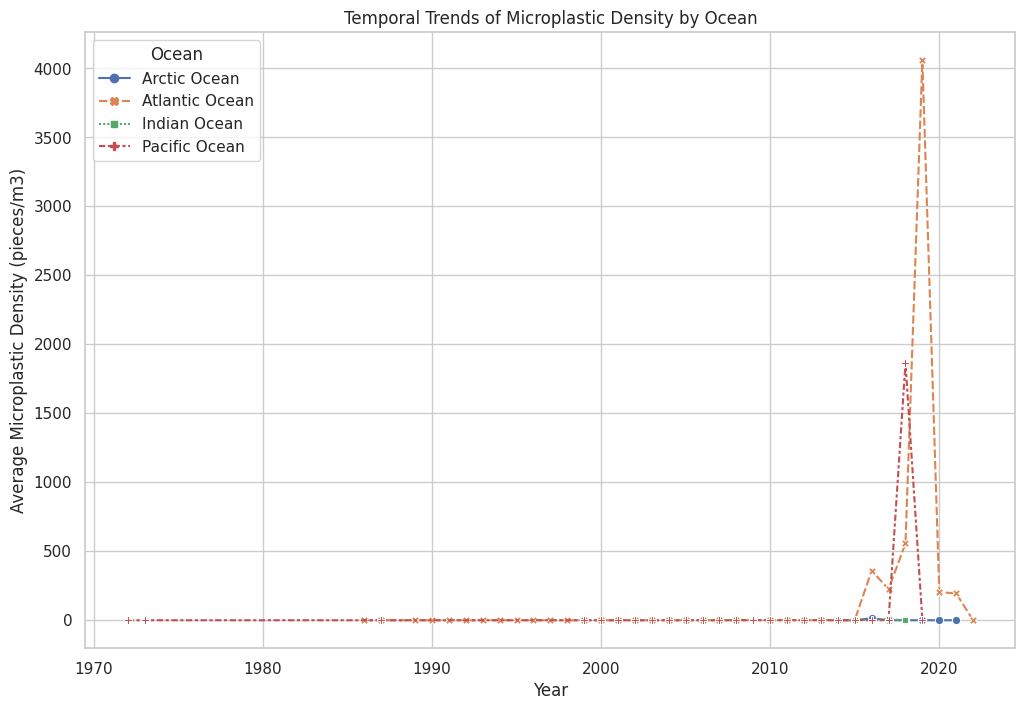

In [53]:
# Plot the temporal trends of microplastic density by ocean
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_ocean_pivot, markers=True)
plt.title('Temporal Trends of Microplastic Density by Ocean')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Ocean')
plt.show()

## Plot 2: Monthly Trends of Microplastic Density

* ### Line plot showing the average microplastic density for each month.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


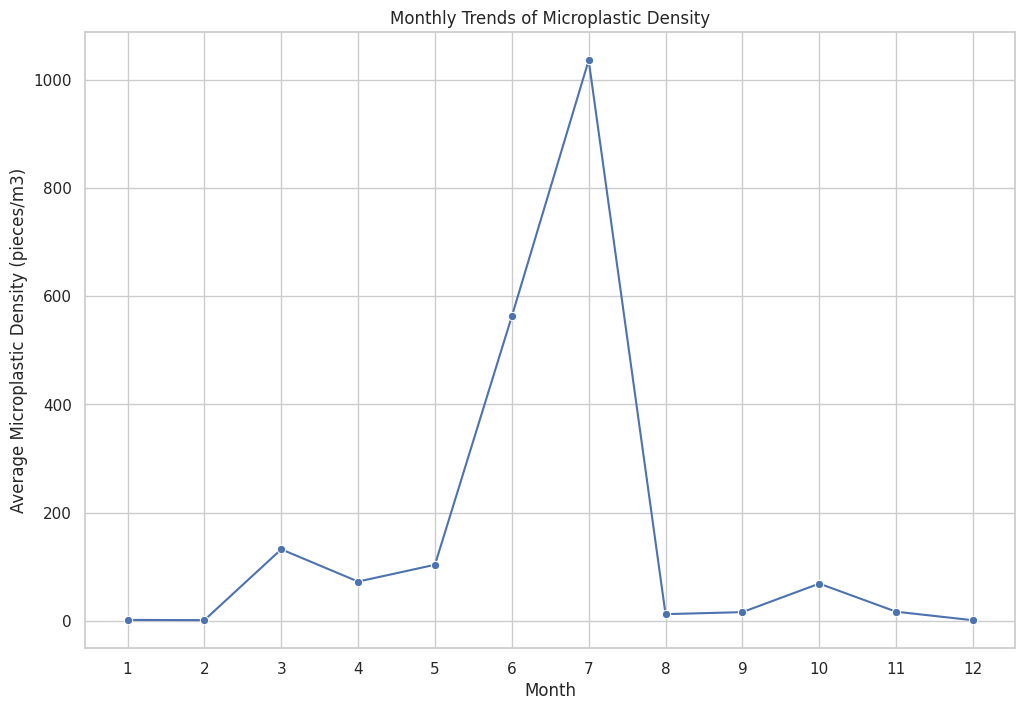

In [54]:
# Group by month and calculate the mean density
monthly_density = df.groupby('Month')['Measurement'].mean().reset_index()

# Plot the monthly trends of microplastic density
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_density, x='Month', y='Measurement', marker='o')
plt.title('Monthly Trends of Microplastic Density')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1))
plt.show()

## Plot 3: Microplastic Density Distribution by Year

* ### Box plot showing the distribution of microplastic density for each year.

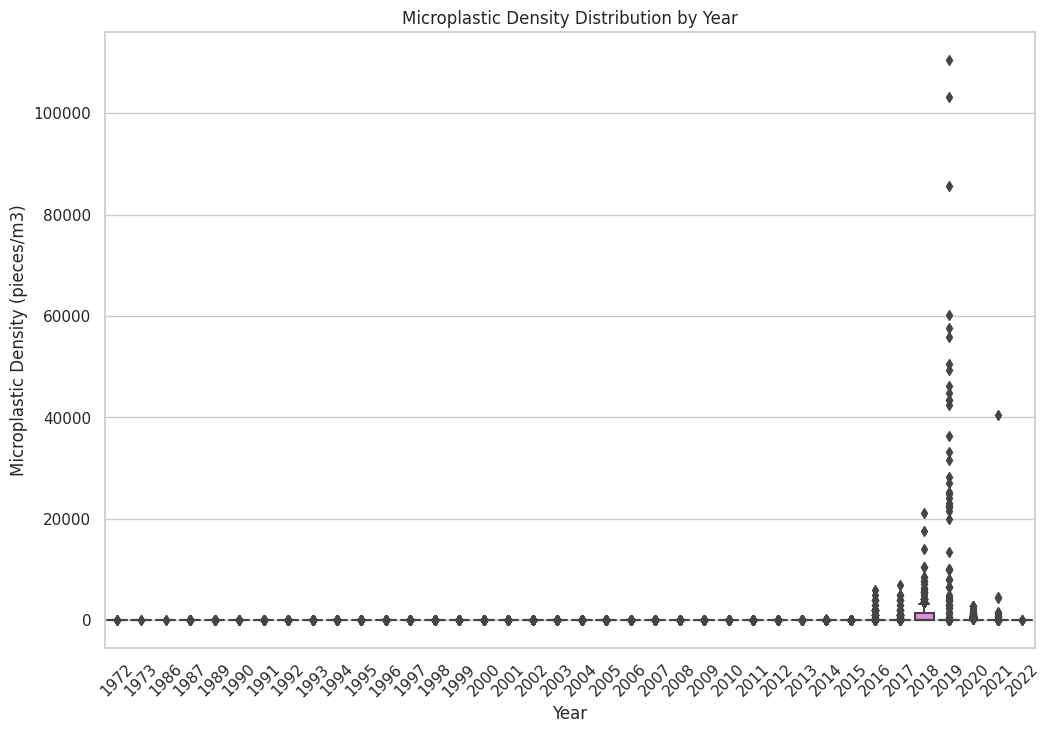

In [55]:
# Plot the density distribution by year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Year', y='Measurement')
plt.title('Microplastic Density Distribution by Year')
plt.ylabel('Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

## Plot 4: Microplastic Density by Sampling Method Over Time

* ### Line plot showing the average microplastic density over the years for different sampling methods.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


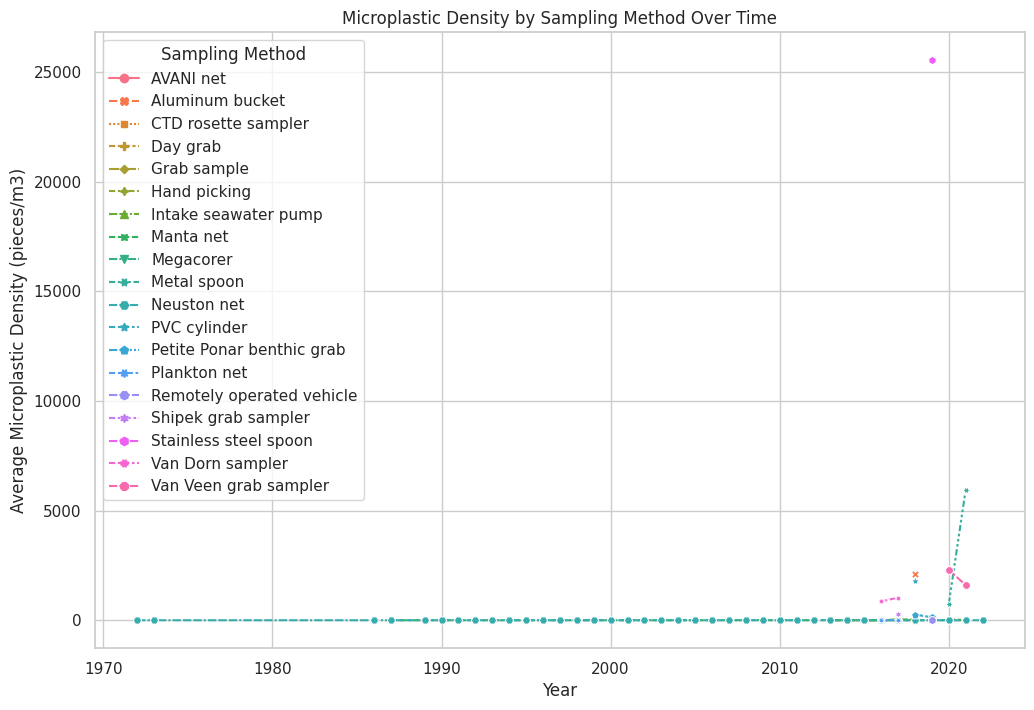

In [56]:

# Group by year and sampling method, then calculate the mean density
yearly_density_method = df.groupby(['Year', 'Sampling Method'])['Measurement'].mean().reset_index()

# Pivot the table to have sampling methods as columns and years as rows
yearly_density_method_pivot = yearly_density_method.pivot(index='Year', columns='Sampling Method', values='Measurement')

# Plot the temporal trends of microplastic density by sampling method
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_method_pivot, markers=True)
plt.title('Microplastic Density by Sampling Method Over Time')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Sampling Method')
plt.show()

### Plot 5: Microplastic Density Heatmap by Ocean and Year

* ### Heatmap showing the average microplastic density for each ocean and year combination.

/tmp/ipykernel_34/3625878219.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(values='Measurement', index='Year', columns='Oceans', aggfunc='mean')


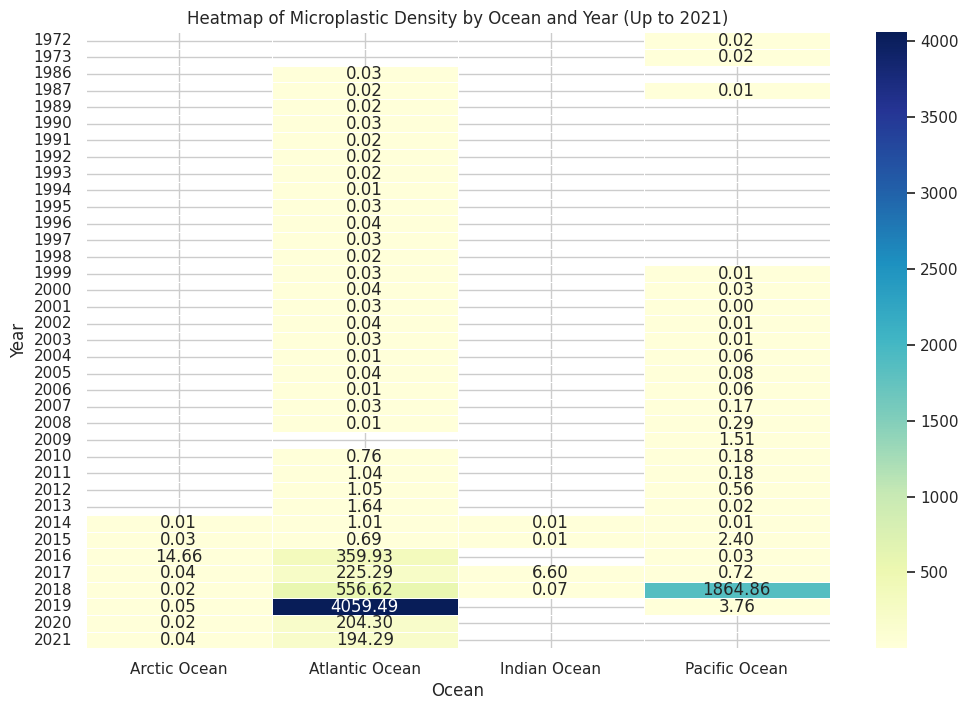

In [57]:
# # Pivot the data to create a heatmap
# heatmap_data = df.pivot_table(values='Measurement', index='Year', columns='Oceans', aggfunc='mean')

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
# plt.title('Heatmap of Microplastic Density by Ocean and Year')
# plt.ylabel('Year')
# plt.xlabel('Ocean')
# plt.show()

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Filter the data to include only years up to 2021
df_filtered = df[df['Year'] <= 2021]

# Pivot the data to create a heatmap
heatmap_data = df_filtered.pivot_table(values='Measurement', index='Year', columns='Oceans', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Microplastic Density by Ocean and Year (Up to 2021)')
plt.ylabel('Year')
plt.xlabel('Ocean')
plt.show()

## Plot 6: Scatter Plot of Microplastic Density by Latitude and Longitude Over Time

* ### Scatter plot showing microplastic density with geographical coordinates, colored by year.

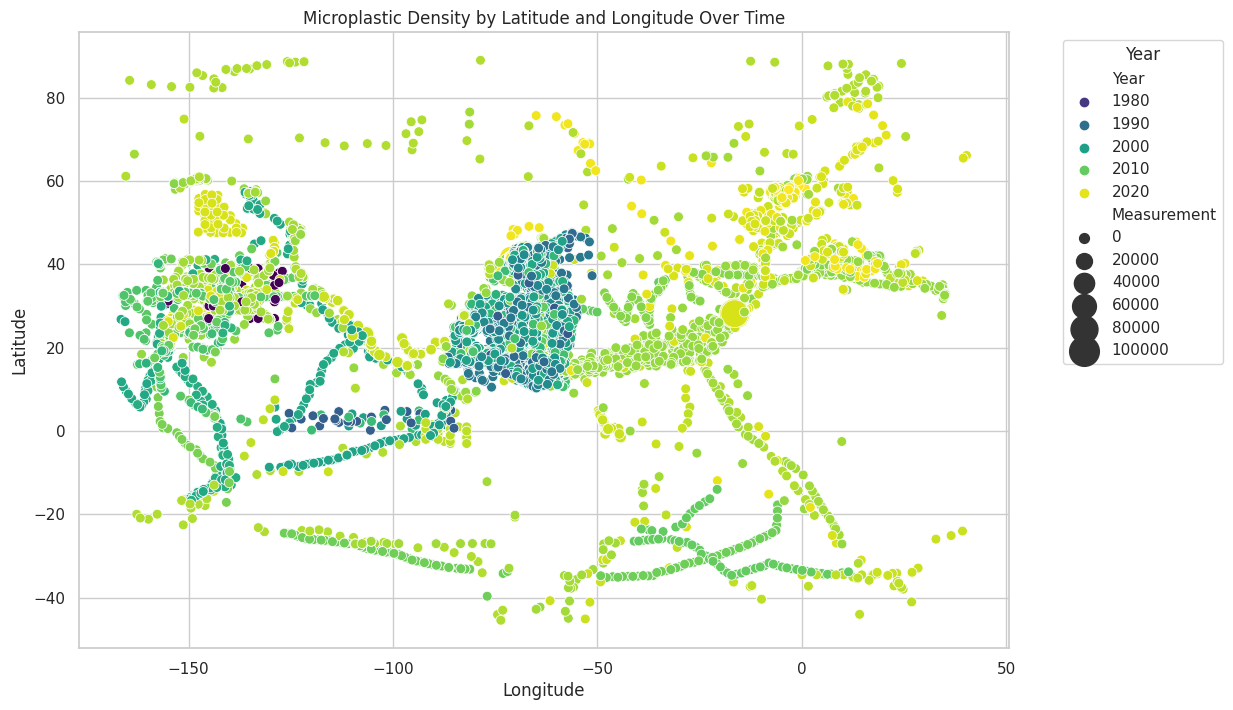

In [58]:
# Scatter plot showing density by latitude and longitude, colored by year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Year', size='Measurement', palette='viridis', sizes=(50, 500))
plt.title('Microplastic Density by Latitude and Longitude Over Time')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Plot 7: Seasonal Variation of Microplastic Density

* ### Bar plot showing the average microplastic density for different seasons.

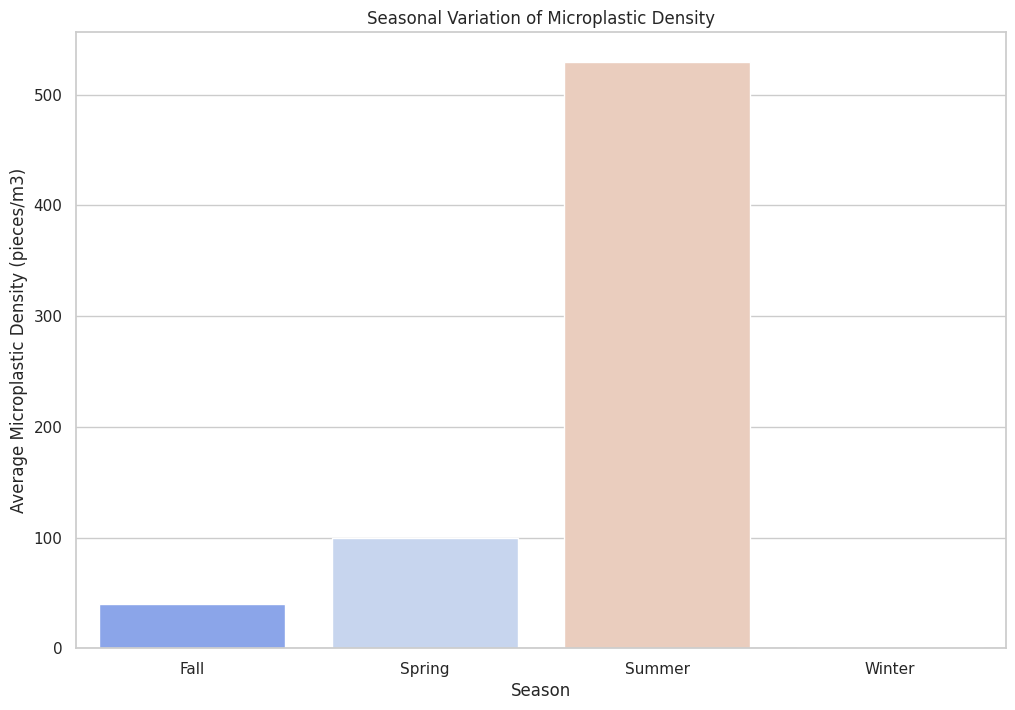

In [59]:
# Define seasons
df['Season'] = df['Month'] % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Group by season and calculate the mean density
seasonal_density = df.groupby('Season')['Measurement'].mean().reset_index()

# Plot the seasonal variation of microplastic density
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_density, x='Season', y='Measurement', palette='coolwarm')
plt.title('Seasonal Variation of Microplastic Density')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Season')
plt.show()

## Plot 8: Temporal Trends of Microplastic Density by Region

* ### Line plot showing the average microplastic density over the years for different regions.

/tmp/ipykernel_34/3204925994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_density_region = df.groupby(['Year', 'Regions'])['Measurement'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=Fals

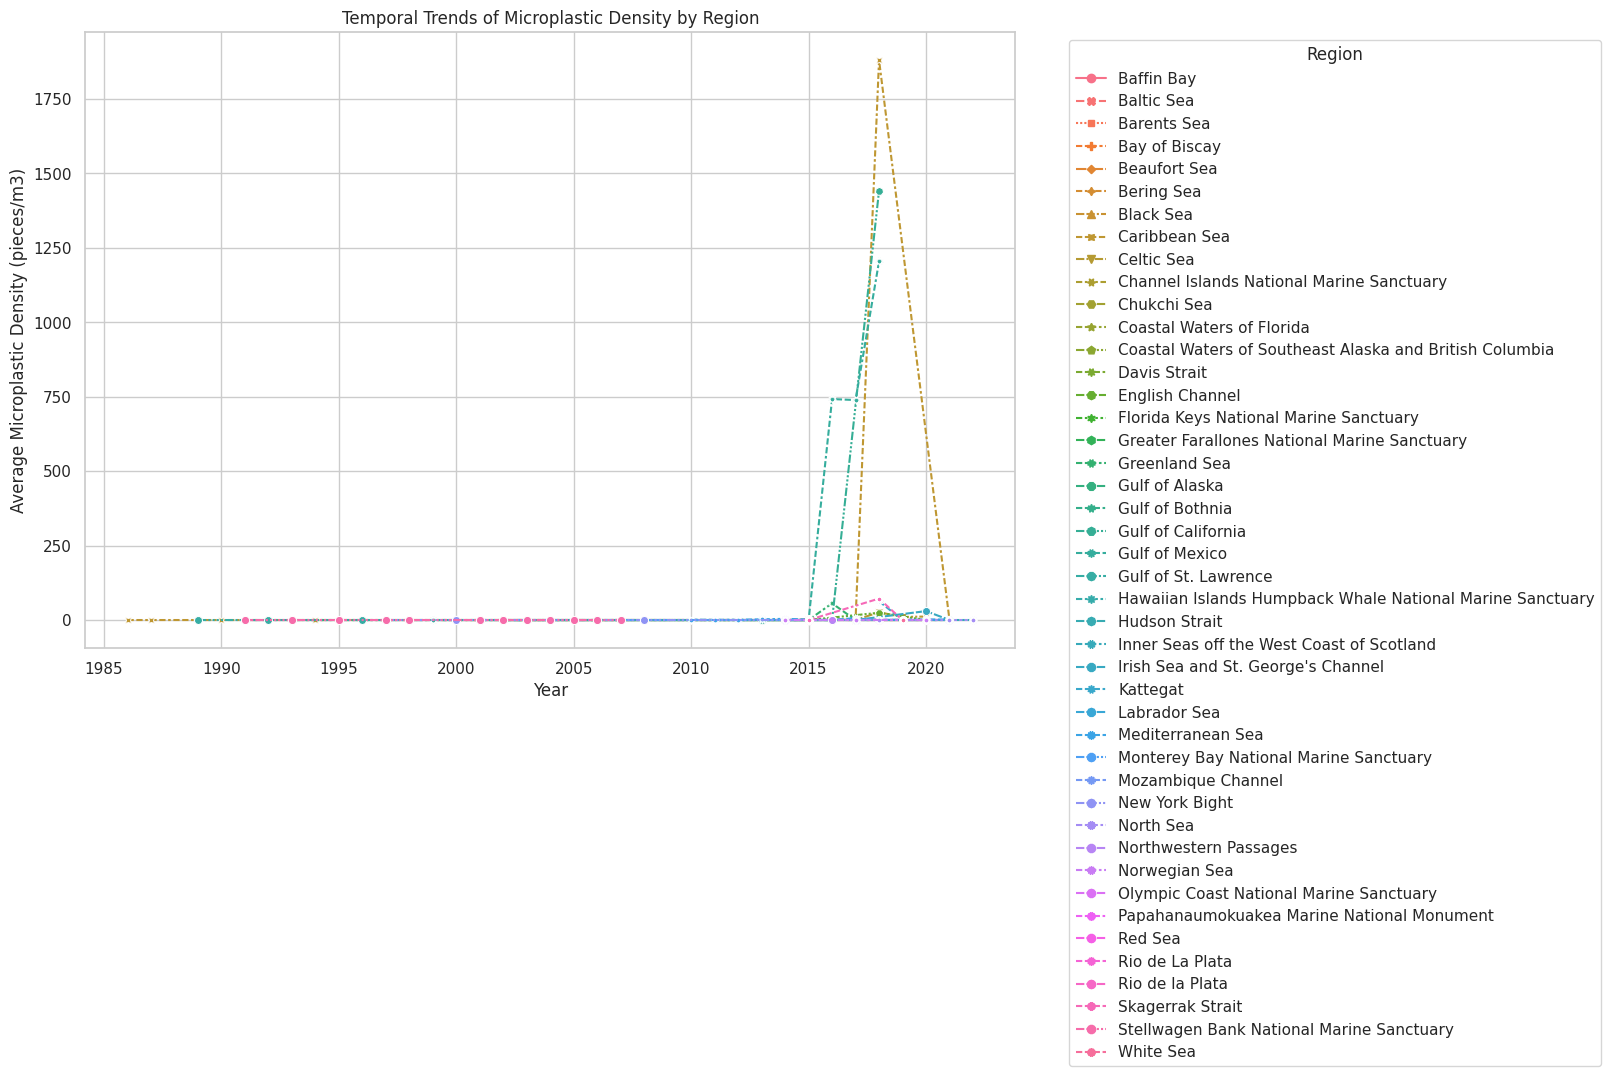

In [60]:
# Group by year and region, then calculate the mean density
yearly_density_region = df.groupby(['Year', 'Regions'])['Measurement'].mean().reset_index()

# Pivot the table to have regions as columns and years as rows
yearly_density_region_pivot = yearly_density_region.pivot(index='Year', columns='Regions', values='Measurement')

# Plot the temporal trends of microplastic density by region
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_region_pivot, markers=True)
plt.title('Temporal Trends of Microplastic Density by Region')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Plot 9: Microplastic Density by Density Class Over Time

* ### Line plot showing the average microplastic density over the years for different density classes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


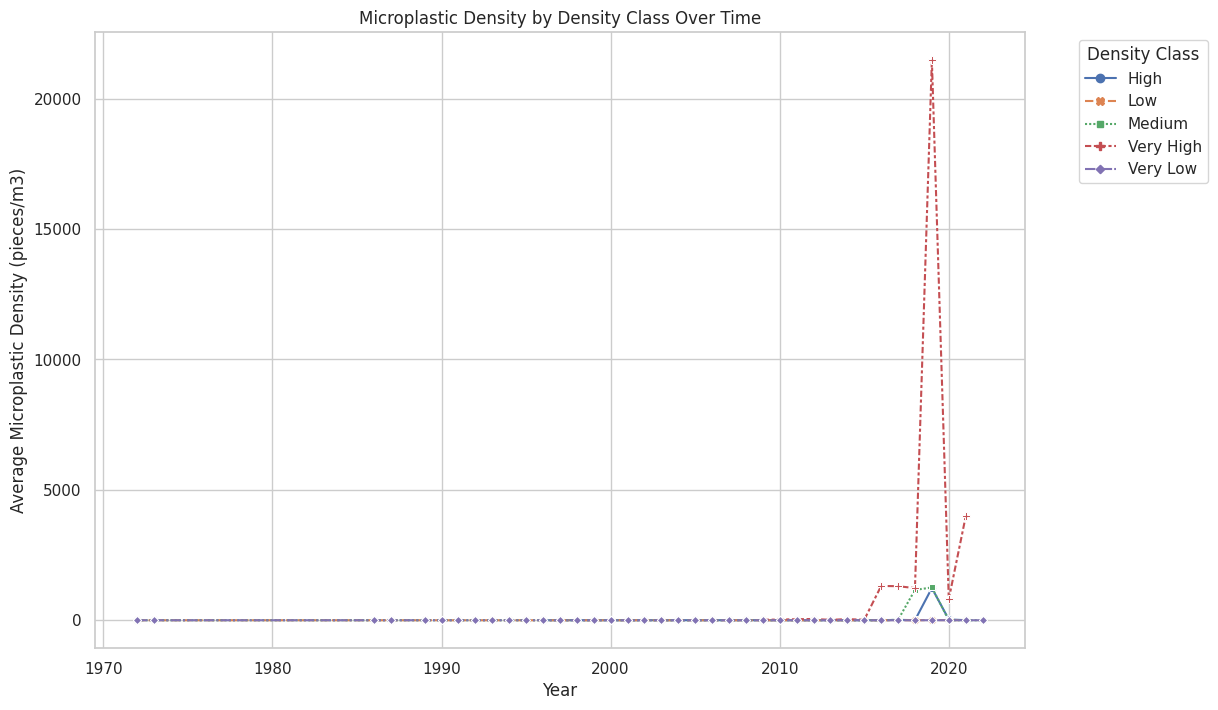

In [61]:
# Group by year and density class, then calculate the mean density
yearly_density_class = df.groupby(['Year', 'Density Class'])['Measurement'].mean().reset_index()

# Pivot the table to have density classes as columns and years as rows
yearly_density_class_pivot = yearly_density_class.pivot(index='Year', columns='Density Class', values='Measurement')

# Plot the temporal trends of microplastic density by density class
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_class_pivot, markers=True)
plt.title('Microplastic Density by Density Class Over Time')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Density Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Plot 10: Temporal Trends of Microplastic Density by Organization

* ### Line plot showing the average microplastic density over the years for different organizations.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


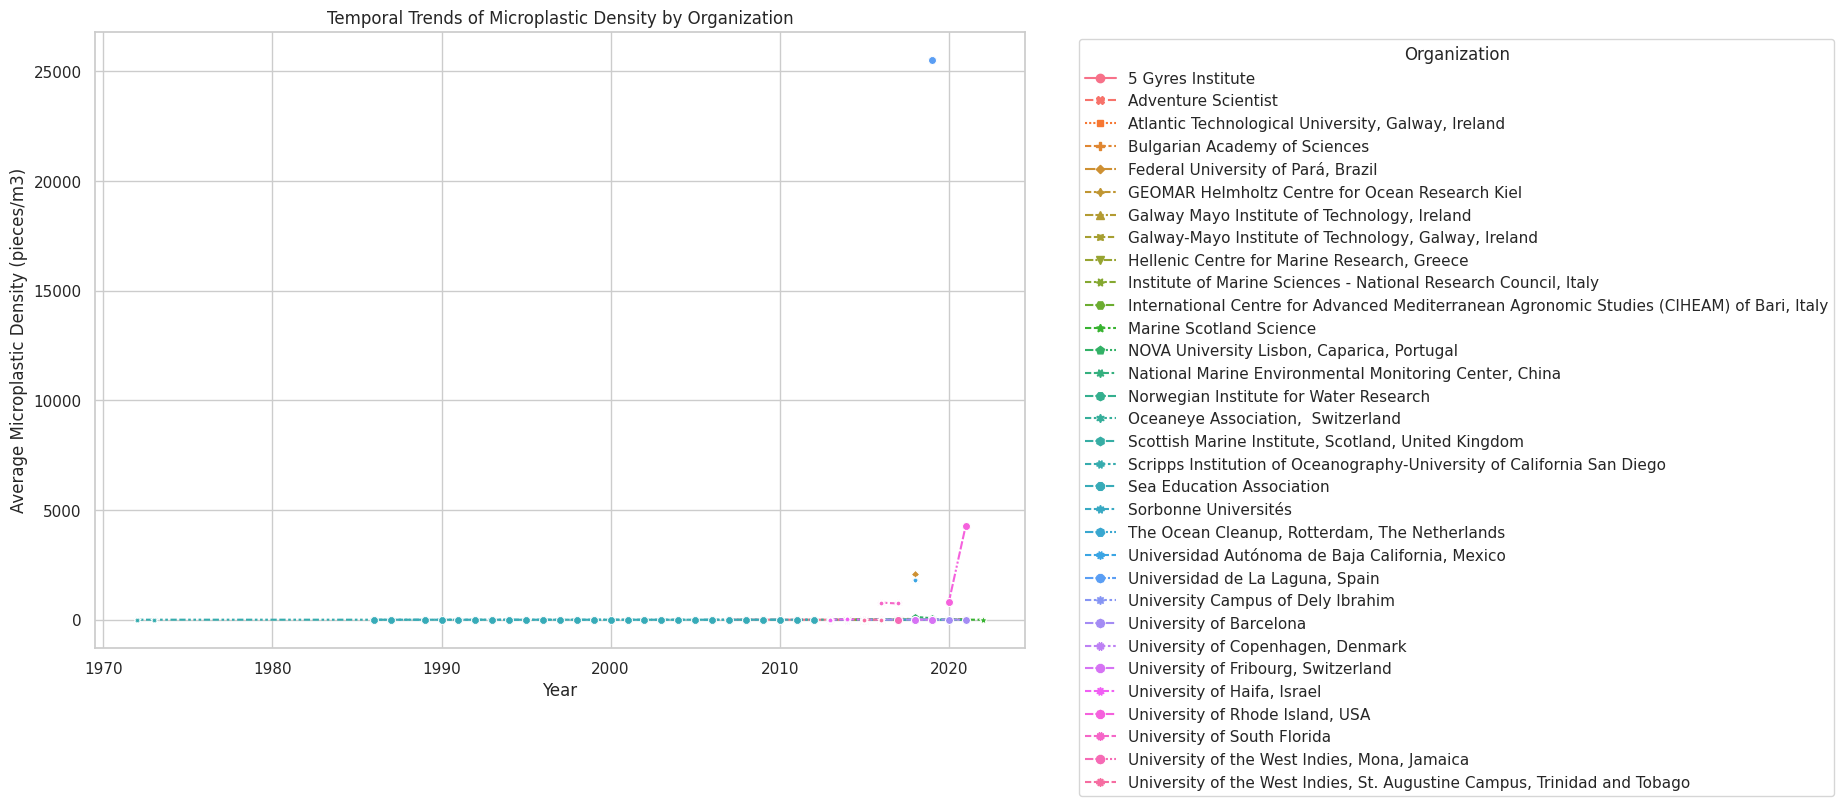

In [62]:
# Group by year and organization, then calculate the mean density
yearly_density_organization = df.groupby(['Year', 'Organization'])['Measurement'].mean().reset_index()

# Pivot the table to have organizations as columns and years as rows
yearly_density_organization_pivot = yearly_density_organization.pivot(index='Year', columns='Organization', values='Measurement')

# Plot the temporal trends of microplastic density by organization
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_organization_pivot, markers=True)
plt.title('Temporal Trends of Microplastic Density by Organization')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Predicting density to 2030+

/tmp/ipykernel_34/3469674789.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_34/3469674789.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_numeric.resample('M').mean().reset_index()
04:04:37 - cmdstanpy - INFO - Chain [1] start processing
04:04:37 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

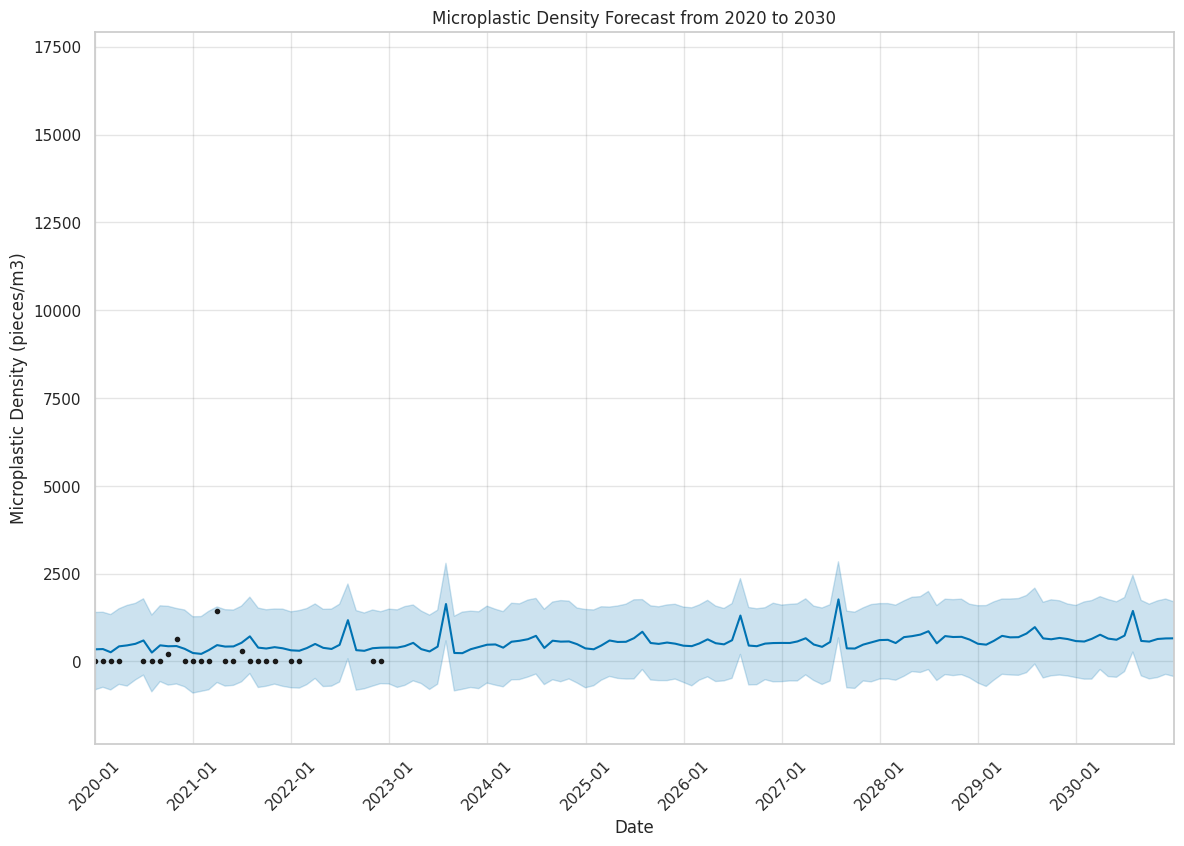

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

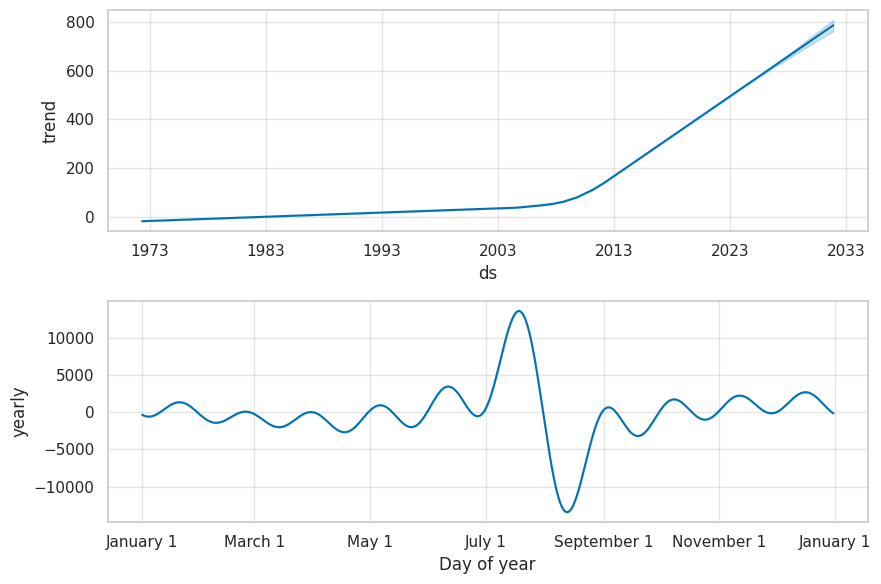

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the data
file_path = '/kaggle/input/marine-microplastics/Marine_Microplastics.csv'
df = pd.read_csv(file_path)

# Convert the Date field to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows where Measurement is missing
df = df.dropna(subset=['Measurement'])

# Ensure only numeric columns are used for resampling
df_numeric = df.set_index('Date')[['Measurement']]

# Aggregate the data by month
df_monthly = df_numeric.resample('M').mean().reset_index()

# Prepare the data for Prophet
df_prophet = df_monthly.rename(columns={'Date': 'ds', 'Measurement': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe with future dates, extending to 2030
future = model.make_future_dataframe(periods=108, freq='M')  # 108 months = 9 years (2021-2030)

# Make predictions
forecast = model.predict(future)

# Plot the forecast starting from 2020
fig, ax = plt.subplots(figsize=(12, 8))
model.plot(forecast, ax=ax)
ax.set_title('Microplastic Density Forecast from 2020 to 2030')
ax.set_xlabel('Date')
ax.set_ylabel('Microplastic Density (pieces/m3)')
ax.set_xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2030-12-31')])

# Improve x-axis labels to show more detail
xticks = pd.date_range(start='2020-01-01', end='2030-12-31', freq='YS')
ax.set_xticks(xticks)
ax.set_xticklabels([date.strftime('%Y-%m') for date in xticks], rotation=45)

plt.show()

# Plot the components
fig2 = model.plot_components(forecast)
plt.show()

/tmp/ipykernel_34/18016457.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
04:04:47 - cmdstanpy - INFO - Chain [1] start processing
04:04:47 - cmdstanpy - INFO - Chain [1] done processing


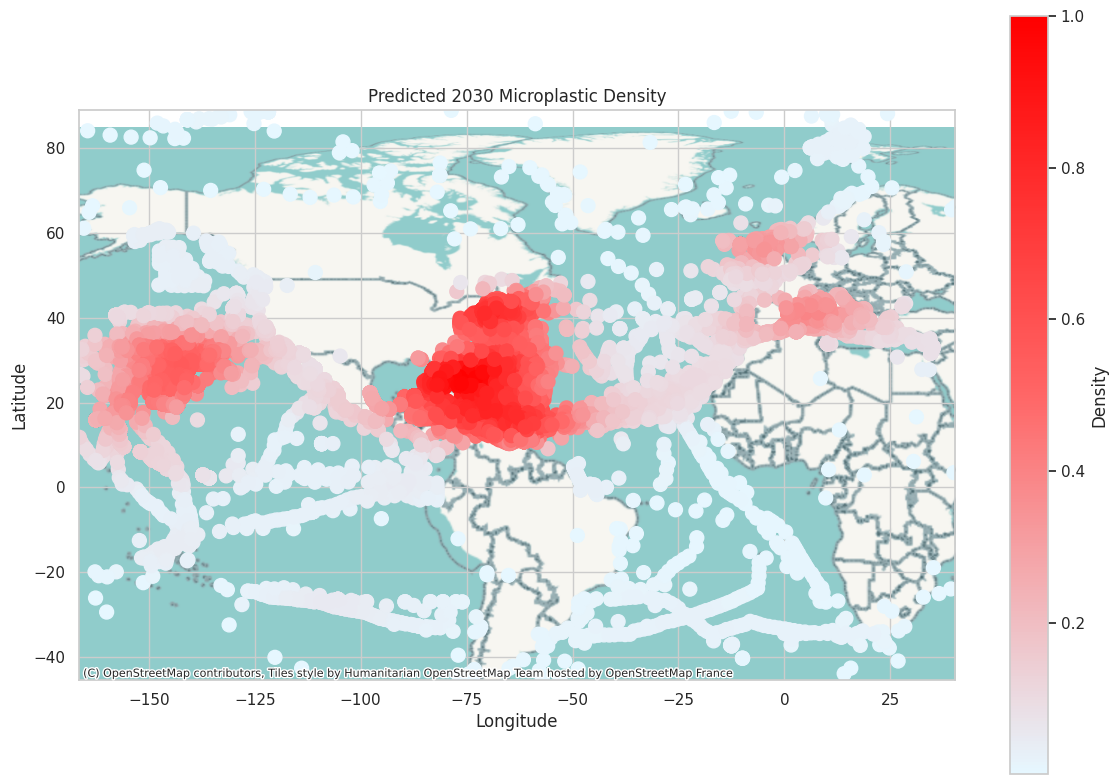

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap

# Load the data
file_path = '/kaggle/input/marine-microplastics/Marine_Microplastics.csv'
df = pd.read_csv(file_path)

# Convert the Date field to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows where Measurement, Latitude, or Longitude is missing
df = df.dropna(subset=['Measurement', 'Latitude', 'Longitude'])

# Normalize the measurement data
scaler = MinMaxScaler()
df['Measurement'] = scaler.fit_transform(df[['Measurement']])

# Prepare data up to the last recorded year (2021 in this case)
last_record_year = df['Date'].dt.year.max()
df_up_to_2021 = df[df['Date'].dt.year <= last_record_year]

# Rename the 'Date' column to avoid conflict during groupby operation
df = df.rename(columns={'Date': 'Date_original'})
df['Date'] = df['Date_original'].dt.to_period('M').dt.to_timestamp()

# Aggregate the data for future prediction
df_prophet = df[['Date', 'Measurement']].groupby('Date').mean().reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Measurement': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=108, freq='MS')  # From 2022 to 2030
forecast = model.predict(future)

# Extract the forecasted data for the future
forecast_2022_2030 = forecast[(forecast['ds'].dt.year >= 2022) & (forecast['ds'].dt.year <= 2030)]
forecast_2022_2030 = forecast_2022_2030[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Measurement'})
forecast_2022_2030['Measurement'] = scaler.transform(forecast_2022_2030[['Measurement']])

# Assign latitude and longitude for the forecast data (assume random points within the existing lat/lon range for demo)
np.random.seed(0)
lat_range = df['Latitude'].min(), df['Latitude'].max()
lon_range = df['Longitude'].min(), df['Longitude'].max()
forecast_2022_2030['Latitude'] = np.random.uniform(lat_range[0], lat_range[1], len(forecast_2022_2030))
forecast_2022_2030['Longitude'] = np.random.uniform(lon_range[0], lon_range[1], len(forecast_2022_2030))

# Combine historical data with forecasted data for 2030 plot
combined_2030 = pd.concat([df_up_to_2021, forecast_2022_2030])

# Function to create a heatmap with custom colormap
def create_heatmap(data, title, ax, cmap):
    xy = np.vstack([data['Longitude'], data['Latitude']])
    z = gaussian_kde(xy)(xy)
    # Normalize z values to use the full range of the colormap
    z = z / z.max()
    sc = ax.scatter(data['Longitude'], data['Latitude'], c=z, s=100, cmap=cmap)
    plt.colorbar(sc, ax=ax, label='Density')
    ax.set_title(title)
    ctx.add_basemap(ax, crs='EPSG:4326')
    ax.set_xlim([data['Longitude'].min(), data['Longitude'].max()])
    ax.set_ylim([data['Latitude'].min(), data['Latitude'].max()])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Create custom colormap
colors = ["#e6f7ff", "#ff6666", "#ff0000"]  # Very light blue to red
cmap = LinearSegmentedColormap.from_list("blue_to_red", colors)

# Plot the data on a geographical map
fig, ax = plt.subplots(figsize=(12, 8))

# Heatmap for up to 2030 (historical + forecasted data)
create_heatmap(combined_2030, '2030 Microplastic Density', ax, cmap=cmap)

plt.tight_layout()
plt.show()

### Conclusion

#### Summary of Findings

In this comprehensive analysis, we explored the temporal trends of marine microplastic density using a rich dataset that spans various oceans, regions, and sampling methods over several years. Our key findings include:

1. **Temporal Trends by Ocean**:
   - The analysis revealed significant temporal variations in microplastic density across different oceans. Some oceans showed increasing trends in microplastic density over the years, highlighting areas of concern.

2. **Monthly and Seasonal Variations**:
   - We observed clear seasonal patterns in microplastic density, with certain months and seasons exhibiting higher levels of microplastics. This indicates potential seasonal factors influencing microplastic distribution.

3. **Effectiveness of Sampling Methods**:
   - Different sampling methods were compared, showing variations in their ability to detect microplastics. Understanding these differences is crucial for standardizing sampling protocols and improving data accuracy.

4. **Geospatial Distribution**:
   - Geospatial analysis highlighted specific regions with higher concentrations of microplastics. Visualizing the geographical spread helps in identifying hotspots and directing mitigation efforts.

5. **Density Class Analysis**:
   - The classification of microplastic density into different classes provided insights into the severity of pollution in various regions and over different time periods.

6. **Organizational Contributions**:
   - The contributions of various organizations to the collection and analysis of microplastic data were examined, showcasing the collaborative efforts in addressing this global issue.

#### Implications and Future Work

The insights gained from this analysis underscore the urgent need for continued monitoring and mitigation of marine microplastic pollution. Policymakers, researchers, and environmental organizations can leverage these findings to:

- Develop targeted policies and regulations to reduce plastic pollution at its source.
- Implement effective cleanup strategies in identified hotspots.
- Standardize sampling methods to ensure consistent and reliable data collection.
- Promote international collaboration to address this transboundary environmental challenge.

Future work could involve:
- Expanding the dataset to include more recent data and additional regions.
- Incorporating advanced machine learning models to predict future trends and identify underlying factors driving microplastic pollution.
- Conducting in-depth studies on the impact of microplastics on marine life and human health.

#### Final Thoughts

This analysis provides a valuable foundation for understanding the temporal and spatial dynamics of marine microplastics. By continuing to build on this work, we can make meaningful strides towards a cleaner and healthier ocean ecosystem.

Thank you for exploring this notebook. We hope it inspires further research and action in the fight against marine plastic pollution.